In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
mall = pd.read_csv("data/Train.csv")

In [3]:
mall.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Null values in hundered percent
mall.isnull().sum()*100/mall.shape[0]

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [5]:
mall.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
#drop na points

In [7]:
mall.dropna(inplace=True)

In [8]:
# Gender

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [10]:
le = LabelEncoder()

In [11]:
mall["Gender"] = le.fit_transform(mall.Gender)

In [12]:
#Ever Married

In [13]:
mall["Ever_Married"] = le.fit_transform(mall.Ever_Married)

In [14]:
# Graduated

In [15]:
mall["Graduated"] = le.fit_transform(mall.Graduated)

In [16]:
# Profession

In [17]:
mall.Profession.value_counts()

Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64

In [18]:
le_arr = le.fit_transform(mall.Profession)

In [19]:
ohe = OneHotEncoder()

In [20]:
ohe_arr = ohe.fit_transform(le_arr.reshape(-1,1)).toarray()

In [21]:
mall.reset_index(inplace= True)
mall.drop(columns = "index",inplace = True)

In [22]:
mall[50:60]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
50,464091,1,1,74,1,Lawyer,0.0,High,3.0,Cat_6,D
51,464535,1,1,56,1,Lawyer,1.0,High,2.0,Cat_6,A
52,463108,1,1,59,1,Lawyer,7.0,High,2.0,Cat_6,A
53,461356,1,0,25,1,Entertainment,0.0,Low,2.0,Cat_6,A
54,464570,1,1,31,1,Doctor,0.0,Average,2.0,Cat_6,A
55,464580,1,0,27,0,Artist,8.0,Low,4.0,Cat_6,A
56,465233,1,1,57,1,Artist,0.0,Average,4.0,Cat_6,B
57,459954,1,1,27,1,Healthcare,8.0,Low,2.0,Cat_6,D
58,460219,0,1,51,1,Entertainment,8.0,Average,2.0,Cat_6,A
59,460877,0,1,47,0,Artist,0.0,Average,5.0,Cat_6,B


In [23]:
ohe_arr[54,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
ohe_df = pd.DataFrame(ohe_arr,columns = ["Artist","Doctor","Engineer","Entertainment","Executive","Healthcare","Homemaker","Lawyer","Marketing"])

In [25]:
mall["Artist"] = ohe_df["Artist"]
mall["Doctor"] = ohe_df["Doctor"]
mall["Engineer"] = ohe_df["Engineer"]
mall["Entertainment"] = ohe_df["Entertainment"]
mall["Executive"] = ohe_df["Executive"]
mall["Healthcare"] = ohe_df["Healthcare"]
mall["Homemaker"] = ohe_df["Homemaker"]
mall["Lawyer"] = ohe_df["Lawyer"]
mall["Marketing"] = ohe_df["Marketing"]

In [26]:
#Spending

In [27]:
mall.Spending_Score.value_counts()

Low        3999
Average    1662
High       1004
Name: Spending_Score, dtype: int64

In [28]:
lst = []
for i in range(len(mall)):
    if mall.Spending_Score.iloc[i] == "Low":
        lst.append(0)
    elif mall.Spending_Score.iloc[i] == "Average":
        lst.append(1)
    elif mall.Spending_Score.iloc[i] == "High":
        lst.append(2)
mall.Spending_Score = lst

In [29]:
mall

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461319,1,1,56,0,Artist,0.0,1,2.0,Cat_6,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460156,1,0,32,1,Healthcare,1.0,0,3.0,Cat_6,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,463002,1,1,41,1,Artist,0.0,2,5.0,Cat_6,B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6661,464685,1,0,35,0,Executive,3.0,0,4.0,Cat_4,D,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6662,465406,0,0,33,1,Healthcare,1.0,0,1.0,Cat_6,D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6663,467299,0,0,27,1,Healthcare,1.0,0,4.0,Cat_6,B,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
#Var_1

In [31]:
mall.Var_1.value_counts()

Cat_6    4476
Cat_4     849
Cat_3     634
Cat_2     362
Cat_7     166
Cat_1     104
Cat_5      74
Name: Var_1, dtype: int64

In [32]:
some_df = le.fit_transform(mall.Var_1)

In [33]:
one_df = ohe.fit_transform(some_df.reshape(-1,1)).toarray()

In [34]:
one_df[1]

array([0., 0., 0., 0., 0., 1., 0.])

In [35]:
mall.Var_1[1]

'Cat_6'

In [36]:
xx = pd.DataFrame(one_df,columns = ["Cat_1","Cat_2","Cat_3","Cat_4","Cat_5","Cat_6","Cat_7"])

In [37]:
mall["Cat_1"] = xx["Cat_1"]
mall["Cat_2"] = xx["Cat_2"]
mall["Cat_3"] = xx["Cat_3"]
mall["Cat_4"] = xx["Cat_4"]
mall["Cat_5"] = xx["Cat_5"]
mall["Cat_6"] = xx["Cat_6"]
mall["Cat_7"] = xx["Cat_7"]

In [38]:
#Segmentation

In [39]:
mall.Segmentation.iloc[62:80]

62    B
63    D
64    A
65    C
66    C
67    D
68    A
69    B
70    A
71    D
72    C
73    C
74    D
75    D
76    B
77    C
78    C
79    D
Name: Segmentation, dtype: object

In [40]:
sm = le.fit_transform(mall.Segmentation)

In [41]:
mall["Segmentation"] = sm

In [42]:
#X AND Y

In [43]:
X = mall.select_dtypes(exclude = "object")

In [44]:
y = mall.Segmentation

In [45]:
X.drop(columns=["ID","Segmentation"],inplace=True)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(2)

In [48]:
X_poly = poly.fit_transform(X)

In [49]:
X_poly = pd.DataFrame(X_poly,columns = poly.get_feature_names(X.columns))
X_poly.drop(columns= "1",inplace = True)

In [50]:
from sklearn.model_selection import train_test_split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [51]:
#Corelattion

In [52]:
corr = mall.corr()

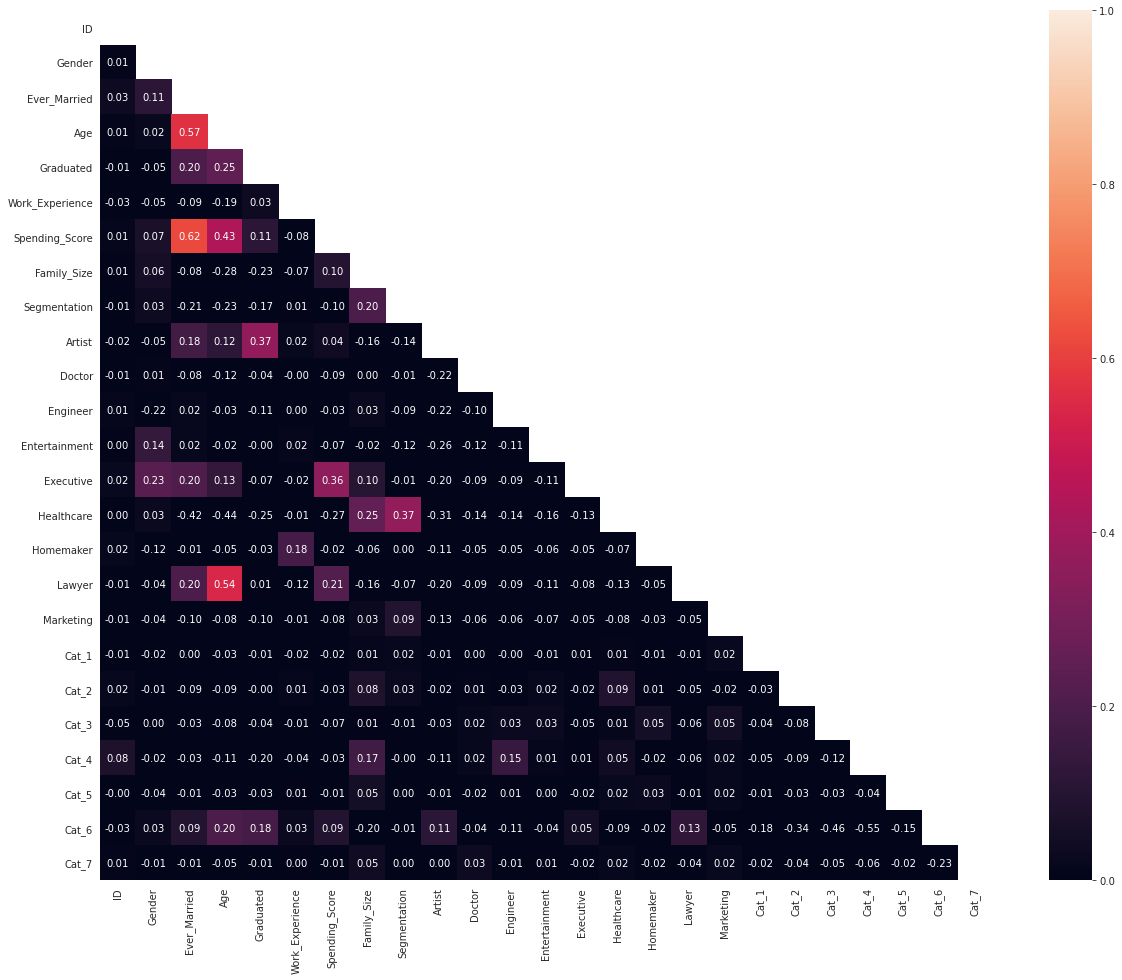

In [53]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 16))
    ax = sns.heatmap(corr, mask=mask, vmin = 0 , vmax=1,fmt=".2f",annot = True)

In [54]:
# train_test

from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# LOGREG

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression(multi_class="multinomial",C=1)

In [59]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, multi_class='multinomial')

In [60]:
pred_log_ytest = log_reg.predict(X_test)
pred_log_ytrain = log_reg.predict(X_train)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print("LOGISTIC REGRESSION RESULTS\n--------------------------")
print("---------------TRAIN------------------")
print(classification_report(y_train,pred_log_ytrain))
print("-------------TEST---------------")
print(classification_report(y_test,pred_log_ytest))

LOGISTIC REGRESSION RESULTS
--------------------------
---------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.42      0.44      0.43      1301
           1       0.37      0.17      0.23      1270
           2       0.47      0.67      0.55      1374
           3       0.65      0.68      0.67      1387

    accuracy                           0.50      5332
   macro avg       0.48      0.49      0.47      5332
weighted avg       0.48      0.50      0.47      5332

-------------TEST---------------
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       315
           1       0.37      0.16      0.23       302
           2       0.45      0.66      0.53       346
           3       0.66      0.67      0.67       370

    accuracy                           0.49      1333
   macro avg       0.47      0.47      0.46      1333
weighted avg       0.48      0.49      0.47      1333



In [63]:
#KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=18)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [67]:
pred_knn_ytest = knn.predict(X_test)
pred_knn_ytrain = knn.predict(X_train)

In [68]:
print("KNN RESULTS\n--------------------------")
print("---------------TRAIN------------------")
print(classification_report(y_train,pred_knn_ytrain))
print("-------------TEST---------------")
print(classification_report(y_test,pred_knn_ytest))

KNN RESULTS
--------------------------
---------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1301
           1       0.46      0.34      0.39      1270
           2       0.52      0.66      0.58      1374
           3       0.65      0.65      0.65      1387

    accuracy                           0.54      5332
   macro avg       0.53      0.53      0.53      5332
weighted avg       0.53      0.54      0.53      5332

-------------TEST---------------
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       315
           1       0.33      0.24      0.28       302
           2       0.47      0.61      0.53       346
           3       0.60      0.62      0.61       370

    accuracy                           0.48      1333
   macro avg       0.46      0.47      0.46      1333
weighted avg       0.47      0.48      0.47      1333



In [69]:
# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [72]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [73]:
pred_dt_ytest = dt.predict(X_test)
pred_dt_ytrain = dt.predict(X_train)

In [74]:
print("Decision Tree RESULTS\n--------------------------")
print("---------------TRAIN------------------")
print(classification_report(y_train,pred_dt_ytrain))
print("-------------TEST---------------")
print(classification_report(y_test,pred_dt_ytest))

Decision Tree RESULTS
--------------------------
---------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.43      0.31      0.36      1301
           1       0.38      0.36      0.37      1270
           2       0.56      0.60      0.58      1374
           3       0.57      0.71      0.63      1387

    accuracy                           0.50      5332
   macro avg       0.48      0.49      0.48      5332
weighted avg       0.49      0.50      0.49      5332

-------------TEST---------------
              precision    recall  f1-score   support

           0       0.41      0.30      0.35       315
           1       0.39      0.38      0.38       302
           2       0.55      0.55      0.55       346
           3       0.57      0.69      0.62       370

    accuracy                           0.49      1333
   macro avg       0.48      0.48      0.48      1333
weighted avg       0.48      0.49      0.49      1333



In [75]:
# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(random_state=42)

In [78]:
params = {"n_estimators":range(70,120,10),"criterion":["gini","entropy"],"max_depth":range(2,6)}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
gr = GridSearchCV(estimator = rf, param_grid=params,cv =5 , return_train_score=True,scoring="accuracy")

In [81]:
gr.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'n_estimators': range(70, 120, 10)},
             return_train_score=True, scoring='accuracy')

In [82]:
df = pd.DataFrame()
df["params"] = gr.cv_results_["params"]
df["mean_test_score"] = gr.cv_results_["mean_test_score"]
df["mean_train_score"] = gr.cv_results_["mean_train_score"]

In [83]:
df["sub"] = df.mean_train_score.to_numpy() - df.mean_test_score.to_numpy()

In [84]:
df.sort_values(by="sub",inplace=True)

In [85]:
df.params.iloc[0]

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 110}

In [86]:
rf = RandomForestClassifier(n_estimators=100,max_depth=2,criterion="entropy")

In [87]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2)

In [88]:
pred_rf_ytest = rf.predict(X_test)
pred_rf_ytrain = rf.predict(X_train)

In [89]:
print("Random Forest RESULTS\n--------------------------")
print("---------------TRAIN------------------")
print(classification_report(y_train,pred_rf_ytrain))
print("-------------TEST---------------")
print(classification_report(y_test,pred_rf_ytest))

Random Forest RESULTS
--------------------------
---------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.44      0.40      0.42      1301
           1       0.32      0.04      0.06      1270
           2       0.46      0.76      0.57      1374
           3       0.60      0.76      0.67      1387

    accuracy                           0.50      5332
   macro avg       0.45      0.49      0.43      5332
weighted avg       0.46      0.50      0.44      5332

-------------TEST---------------
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       315
           1       0.42      0.04      0.08       302
           2       0.47      0.75      0.58       346
           3       0.59      0.74      0.66       370

    accuracy                           0.50      1333
   macro avg       0.48      0.48      0.43      1333
weighted avg       0.48      0.50      0.45      1333



In [90]:
# XGB

In [91]:
from xgboost import XGBClassifier

In [92]:
xgb = XGBClassifier(random_state = 42,n_estimators = 60,max_depth = 3,learning_rate = 0.1, gamma = 0.1,min_child_weight=7)

In [93]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
predict_xgb_train = xgb.predict(X_train)
predict_xgb_test = xgb.predict(X_test)

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 380 to 860
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           5332 non-null   int32  
 1   Ever_Married     5332 non-null   int32  
 2   Age              5332 non-null   int64  
 3   Graduated        5332 non-null   int32  
 4   Work_Experience  5332 non-null   float64
 5   Spending_Score   5332 non-null   int64  
 6   Family_Size      5332 non-null   float64
 7   Artist           5332 non-null   float64
 8   Doctor           5332 non-null   float64
 9   Engineer         5332 non-null   float64
 10  Entertainment    5332 non-null   float64
 11  Executive        5332 non-null   float64
 12  Healthcare       5332 non-null   float64
 13  Homemaker        5332 non-null   float64
 14  Lawyer           5332 non-null   float64
 15  Marketing        5332 non-null   float64
 16  Cat_1            5332 non-null   float64
 17  Cat_2        

In [96]:
print("XGB RESULTS\n--------------------------")
print("---------------TRAIN------------------")
print(classification_report(y_train,predict_xgb_train))
print("-------------TEST---------------")
print(classification_report(y_test,predict_xgb_test))

XGB RESULTS
--------------------------
---------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1301
           1       0.46      0.37      0.41      1270
           2       0.60      0.62      0.61      1374
           3       0.66      0.73      0.69      1387

    accuracy                           0.57      5332
   macro avg       0.56      0.56      0.56      5332
weighted avg       0.56      0.57      0.56      5332

-------------TEST---------------
              precision    recall  f1-score   support

           0       0.45      0.50      0.47       315
           1       0.43      0.33      0.37       302
           2       0.58      0.62      0.60       346
           3       0.65      0.69      0.67       370

    accuracy                           0.54      1333
   macro avg       0.53      0.53      0.53      1333
weighted avg       0.54      0.54      0.54      1333



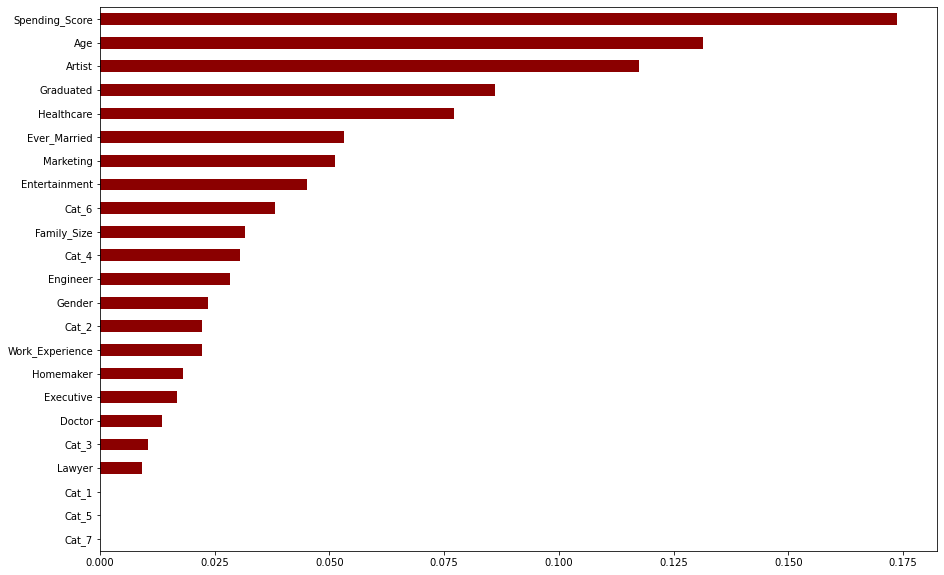

In [97]:
importance_level = pd.Series(data=xgb.feature_importances_ ,index = X_train.columns)

importance_level_sorted = importance_level.sort_values()
plt.figure(figsize=(15,10))
importance_level_sorted.plot(kind="barh",color ="darkred")
plt.show()

In [98]:
# ANN

In [99]:
from tensorflow.keras.models import Sequential

In [100]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.utils import to_categorical

In [101]:
y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

In [102]:
n_outputs = y_train_cat.shape[1]

In [103]:
ann_model = Sequential()
ann_model.add(Dense(32,activation= "relu",input_shape=(X_train.shape[1],)))
ann_model.add(Dense(16,activation = "tanh"))
ann_model.add(Dense(32,activation = "relu"))
ann_model.add(Dense(16,activation = "relu"))
ann_model.add(Dense(n_outputs,activation = "softmax"))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [104]:
ann_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics = ["accuracy"])

In [105]:
ann_model.fit(X_train,y_train_cat,epochs=16,verbose = 0 , batch_size = 64)

In [106]:
ann_model.evaluate(X_test,y_test_cat,batch_size= 64,verbose = 0)[1]

0.5011252760887146

In [107]:
ann_model.evaluate(X_train,y_train_cat,batch_size= 64,verbose = 0)[1]

0.5138784646987915

In [108]:
pred_prob = ann_model.predict(X_test)

In [109]:
predictions = np.argmax(pred_prob,axis = 1)

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
hm = confusion_matrix(y_test,predictions)

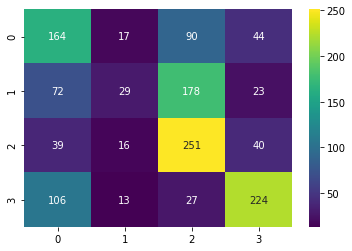

In [112]:
sns.heatmap(pd.DataFrame(hm),annot=True,cmap="viridis",fmt=".0f")
plt.show()

In [113]:
#joblib

In [114]:
import joblib

In [115]:
joblib.dump(xgb,"xgb.joblib")

['xgb.joblib']

In [116]:
joblib.dump(rf,"rf.joblib")

['rf.joblib']

In [117]:
joblib.dump(dt,"dt.joblib")

['dt.joblib']

In [118]:
knn
joblib.dump(knn,"knn.joblib")

['knn.joblib']

In [119]:
joblib.dump(log_reg,"log_reg.joblib")

['log_reg.joblib']

In [120]:
X_train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Artist', 'Doctor', 'Engineer',
       'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer',
       'Marketing', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6',
       'Cat_7'],
      dtype='object')